# HandWritten MNIST with Fully Connected Neural Network (FCN)
in this tutorial, we'll learn how to classify handwritten digits using a Fully Connected Neural Network (FCN) on the MNIST dataset. The MNIST dataset consists of 28x28 grayscale images of digits from 0 to 9. Our goal is to train a neural network to correctly classify each image into one of these digit classes.

We will cover concepts
1. Load the MNIST dataset.
2. Preprocess the data for the model.
3. Build a simple fully connected neural network.
4. Train and evaluate the model.

## importing libraies
**TensorFlow**: This is the primary library we'll use to build and train the neural network. <br>
**Matplotlib**: We’ll use this to visualize some of the dataset images.

In [ ]:
!pip install tensorflow numpy matplotlib

## loading the MNIST Dataset
TensorFlow provides easy access to the MNIST dataset, which is already pre-split into training and test sets:
x_train and x_test contain the images.
y_train and y_test contain the labels, which are the corresponding digits (0-9) for the images.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Pre-processing the Data
Neural networks work best when the input values are scaled between 0 and 1. The pixel values of the images range from 0 to 255, so we need to normalize them by dividing by 255.

In [ ]:
# Normalize the data to 0-1 range
x_train = x_train / 255.0
x_test = x_test / 255.0

## Visualizing the Dataset
Before we build the model, let’s visualize the data to better understand what we are working with. For example, we can display the first image from the training set.

Training set shape: (60000, 28, 28), Labels shape: (60000,)
Test set shape: (10000, 28, 28), Labels shape: (10000,)


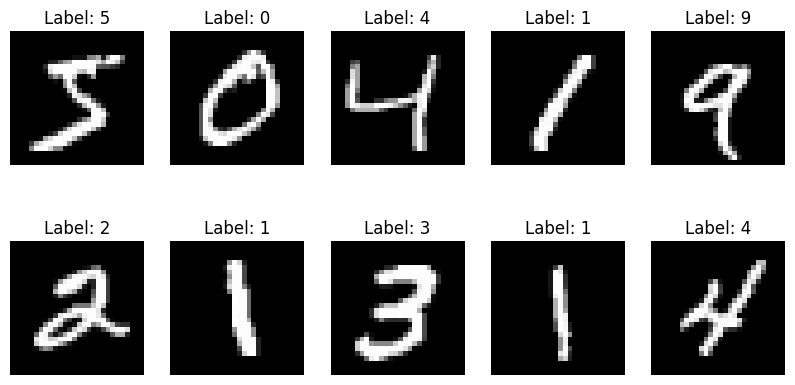

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Print the shapes of the training and test sets
print(f"Training set shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test set shape: {x_test.shape}, Labels shape: {y_test.shape}")

# Function to display a grid of images from the dataset
def plot_sample_images(x_data, y_data, num_images=10):
    plt.figure(figsize=(10, 5))  # Set the figure size
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for images
        plt.imshow(x_data[i], cmap='gray')  # Display the image in grayscale
        plt.title(f"Label: {y_data[i]}")  # Set the title as the label
        plt.axis('off')  # Turn off the axes
    plt.show()

# Display 10 random images from the training set
plot_sample_images(x_train, y_train)


## Building the Fully Connected Neural Network (FCN)
Now we’re ready to build the fully connected neural network. We will use the Sequential model from TensorFlow to stack layers one after another:
**Dense Layers**: These are the fully connected layers. We use two hidden layers with 128 and 64 neurons respectively. The relu activation function introduces non-linearity to the model, which helps it learn more complex patterns.

In [ ]:
#building the model
from tensorflow.keras import layers,models
model=models.Sequential([
    layers.InputLayer(input_shape=(28,28,1)), # Changed input shape to (28,28,1)
    layers.Flatten(), # Added a Flatten layer to convert image data to a 1D array
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

## Compiling the Model
Next, we need to compile the model. This involves selecting the optimizer, the loss function, and the metrics to track during training:
**Optimizer**: The adam optimizer is an adaptive learning rate optimization algorithm that’s widely used in deep learning.
**Loss Function:** sparse_categorical_crossentropy is used for multi-class classification problems. Since the labels are integers (0-9), this loss function is appropriate.
**Metrics:** We will track accuracy during training and testing.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model
Now, we’re ready to train the model using the fit() method. This method will run the training process, where the model will learn to classify digits:

*   **Epochs**: We set the number of epochs to 10, meaning the model will see the entire dataset 10 times.
*   **Batch Size**: The batch size is set to 32, meaning the model will update its weights after seeing 32 images at a time.
*   **Validation Data**: We use the test set as validation data to evaluate the model's performance during training.



In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8779 - loss: 0.4136 - val_accuracy: 0.9620 - val_loss: 0.1230
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9677 - loss: 0.1040 - val_accuracy: 0.9691 - val_loss: 0.1038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9777 - loss: 0.0688 - val_accuracy: 0.9700 - val_loss: 0.0979
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9707 - val_loss: 0.0968
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9877 - loss: 0.0375 - val_accuracy: 0.9771 - val_loss: 0.0754
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0305 - val_accuracy: 0.9783 - val_loss: 0.0731
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9911 - loss: 0.0259 - val_accuracy: 0.9778 - val_loss: 0.0804
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9927 - loss: 0.0216 - 

## Evaluating the Model
Once training is complete, we can evaluate the model's performance on the test data.

**Explanation:**The evaluate() method returns the loss and accuracy on the test set. The test_acc will show how well the model generalizes to unseen data.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9699 - loss: 0.1222
Test accuracy: 0.9746999740600586


## Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


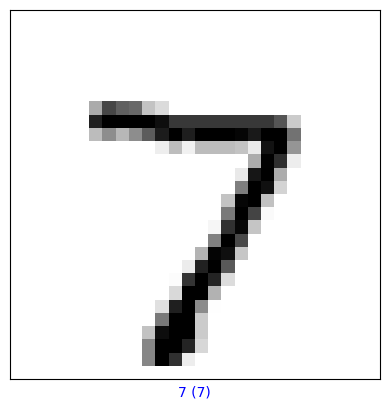

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test set
predictions = model.predict(x_test)

# Visualize a random test image and its predicted label
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i].reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array[i])
    true_label = true_label[i]

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

# Display the first test image and prediction
plot_image(0, predictions, y_test, x_test)
plt.show()


## saving the model

In [ ]:
# Save the trained model
model.save('mnist_fcn_model.h5')

# Load the model when using it for prediction
from tensorflow.keras.models import load_model
model = load_model('mnist_fcn_model.h5')